In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2)

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

import os
data_path=os.path.dirname(os.path.realpath('__file__'))+"/train.csv"
print data_path

/Users/yichenchang/Documents/workspace/git_submit/deep-learning/train.csv


# Import Image data
The data is composed by label + 784 pixel values of each 28 X 28 images.  

In [4]:
train = pd.read_csv(data_path)
Y_train = train["label"]
X_train = train.drop(labels = ["label"],axis = 1) 
#normalized pixel value
X_train /= 255
train.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Check target
The distribution of target is pretty uniform.  

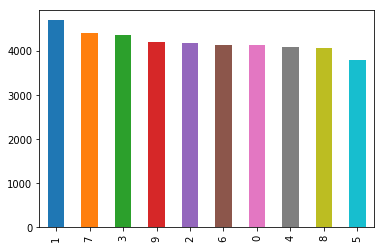

In [12]:
Y_train.value_counts().plot.bar()

# Data cleaning 
There is no null value in the pixel feature.

In [22]:
X_train.isnull().sum().sum()

0

# Reshape pixel and target
 and one hot encode ySince Keras take 4D tensor (-1, width,high,color), we need to reshape the 1D vector back to 3D (-1,28 X 28 X 1). Next we convert the target to one hot vector. For example,  

In [23]:
X_train = X_train.values.reshape(-1,28,28,1)
Y_train = to_categorical(Y_train, num_classes = 10)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=42)

# Build CNN

In [51]:

model = Sequential()

model.add(Conv2D(32,(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32,(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

In [53]:
history = model.fit(x_train, y_train, epochs=5,validation_split=0.1)

Train on 34020 samples, validate on 3780 samples
Epoch 1/5
34020/34020 [==============================] - 83s 2ms/step - loss: 0.2635 - acc: 0.9231 - val_loss: 0.0951 - val_acc: 0.9714
Epoch 2/5
34020/34020 [==============================] - 77s 2ms/step - loss: 0.1613 - acc: 0.9530 - val_loss: 0.0693 - val_acc: 0.9794
Epoch 3/5
34020/34020 [==============================] - 83s 2ms/step - loss: 0.1272 - acc: 0.9623 - val_loss: 0.0661 - val_acc: 0.9807
Epoch 4/5
34020/34020 [==============================] - 90s 3ms/step - loss: 0.1068 - acc: 0.9688 - val_loss: 0.0673 - val_acc: 0.9812
Epoch 5/5
34020/34020 [==============================] - 97s 3ms/step - loss: 0.0976 - acc: 0.9705 - val_loss: 0.0655 - val_acc: 0.9810


['acc', 'loss', 'val_acc', 'val_loss']


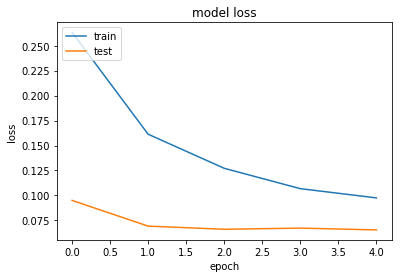

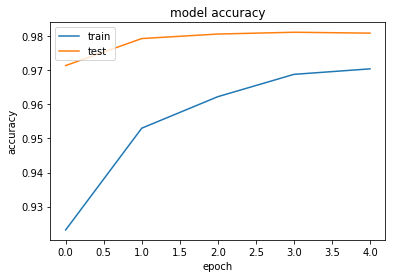

In [55]:
# plot training process
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Model Evaluation

In [56]:
score=model.evaluate(x_test, y_test, batch_size=32)

4200/4200 [==============================] - 3s 749us/step


In [58]:
print 'test_loss=',score[0],'test_accuracy=',score[1]

test_loss= 0.06062092493033214 test_accuracy= 0.9807142857142858


# Futurework 
1. Try different CNN archtecture
2. Try different loss function